In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import data, io

### 14.1 圖像的基本概念

#### 第1題

In [2]:
man=data.camera()

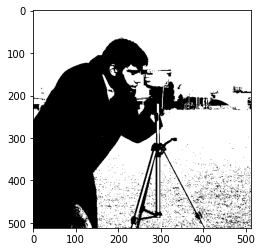

In [3]:
#(a)
plt.imshow(man>128,cmap='gray')
plt.show()

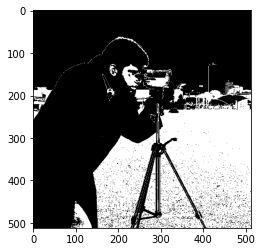

In [4]:
#(b)
plt.imshow(np.logical_and(man>=120,man<=180),cmap='gray')
plt.show()

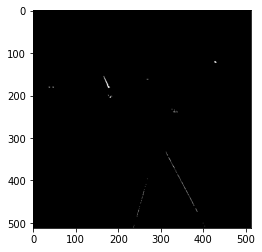

In [5]:
#(c)
plt.imshow(man==255,cmap='gray')
plt.show()

#### 第3題

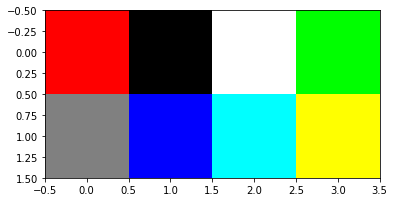

In [6]:
# 做法(一)
img=np.array([[[255,  0,  0],
               [  0,  0,  0],
               [255,255,255],
               [  0,255,  0]],
              [[128,128,128],
               [  0,  0,255],
               [  0,255,255],
               [255,255,  0]]])
plt.imshow(img)
plt.show()

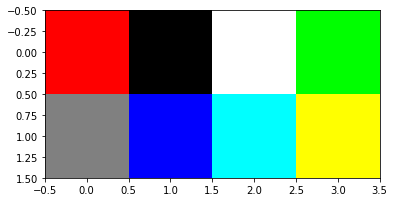

In [7]:
# 做法(二)
r=np.array([[255,0,255,0],
            [128,0,0,255]])
g=np.array([[0,0,255,255],
            [128,0,255,255]])
b=np.array([[0,0,255,0],
            [128,255,255,0]])
plt.imshow(np.stack((r,g,b),axis=2))
plt.show()

### 14.2 認識色表

#### 第5題

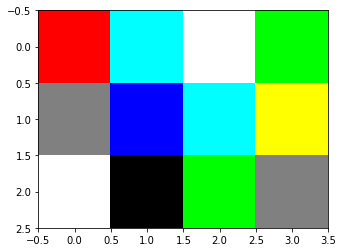

In [8]:
from matplotlib.colors import ListedColormap
palette=np.array([[255,  0,  0],
                  [  0,  0,  0],
                  [255,255,255],
                  [  0,255,  0],
                  [128,128,128],
                  [  0,  0,255],
                  [  0,255,255],
                  [255,255,  0]])/255
newcmp = ListedColormap(palette)
img=np.array([[0,6,2,3],
              [4,5,6,7],
              [2,1,3,4]])
plt.imshow(img,cmap=newcmp)

#### 第7題

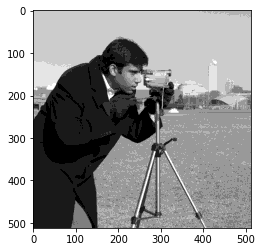

In [9]:
from matplotlib.colors import ListedColormap
val=np.linspace(0,1,11)  # 灰階值
palette=val.reshape(-1,1)*np.ones((1,3))
my_map=ListedColormap(palette)
man=data.camera()

man_palette=np.argmin(np.abs(((man/255).reshape(1,-1)-val[:,None])),axis=0).reshape(man.shape)
plt.imshow(man_palette,cmap=my_map)

### 14.3 基礎圖像處理

#### 第9題

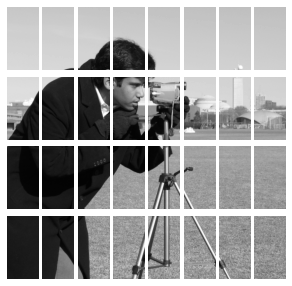

In [10]:
#(a)
man=data.camera()
manP=man.reshape(4,128,8,64).swapaxes(1,2)
fig,ax=plt.subplots(4,8,figsize=(5,5))
for r in range(4):
    for c in range(8):
        ax[r,c].imshow(manP[r,c],cmap='gray',vmin=0,vmax=255)
        ax[r,c].axis('off')
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.1)

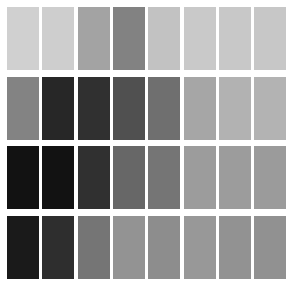

In [11]:
#(b)
manP2=manP.copy()
m=manP.mean(axis=(2,3)).round()
for r in range(4):
    for c in range(8):
        manP2[r,c]=m[r,c]

fig,ax=plt.subplots(4,8,figsize=(5,5))
for r in range(4):
    for c in range(8):
        ax[r,c].imshow(manP2[r,c],cmap='gray',vmin=0,vmax=255)
        ax[r,c].axis('off')
fig.subplots_adjust(wspace=0.1)
fig.subplots_adjust(hspace=0.1)

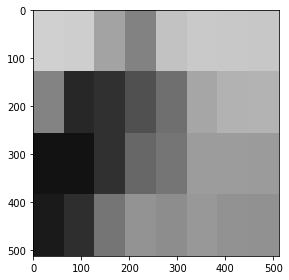

In [12]:
io.imshow(manP2.swapaxes(1,2).reshape(512,512))
io.show()

#### 第11題

小於 5 的像素有 3310 個
大於 250 像素有 831 個


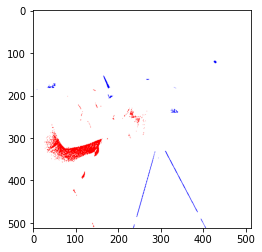

In [13]:
man=data.camera()
print(f'小於 5 的像素有 {np.sum(man<5)} 個')
print(f'大於 250 像素有 {np.sum(man>250)} 個')
map=np.zeros((512,512,3),dtype='uint8')+255
map[:,:,1][man<5]=0
map[:,:,2][man<5]=0
map[:,:,0][man>250]=0
map[:,:,1][man>250]=0
plt.imshow(map)
plt.show()

In [14]:
map.dtype

dtype('uint8')

### 14.4 進階圖像處理

#### 第13題

In [15]:
from skimage import transform

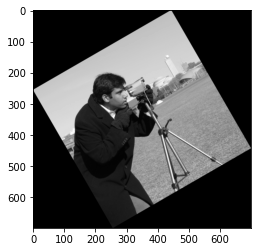

In [16]:
#(a)
man=data.camera()
man_rot=transform.rotate(man,30,cval=0,resize=True)
plt.imshow(man_rot,cmap='gray')

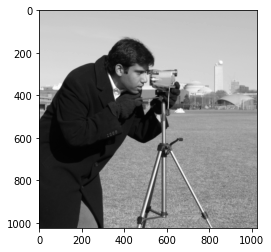

In [17]:
#(b)
man_scale=transform.rescale(man,2)
plt.imshow(man_scale,cmap='gray')

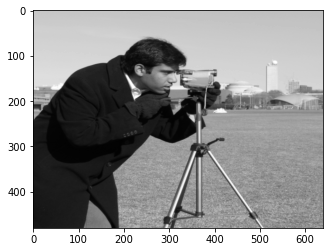

In [18]:
#(c)
man_size=transform.resize(man,(480,640))
plt.imshow(man_size,cmap='gray')

#### 第15題

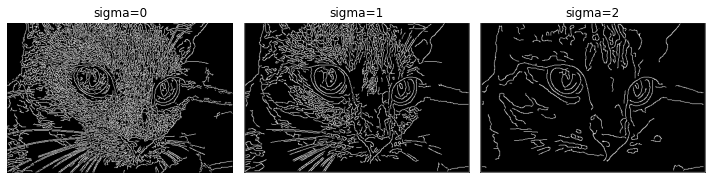

In [19]:
from skimage.feature import canny
from skimage import color
cat=data.chelsea()
fig, ax = plt.subplots(1, 3, figsize=(10, 4))
for i in range(3):
    ax[i].imshow(canny(color.rgb2gray(cat),sigma=i), cmap='gray')
    ax[i].set_title(f'sigma={i}')
    ax[i].axis('off')
fig.tight_layout()

#### 第17題

In [20]:
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage import color

astro_gray=skimage.img_as_ubyte(color.rgb2gray(data.astronaut()))

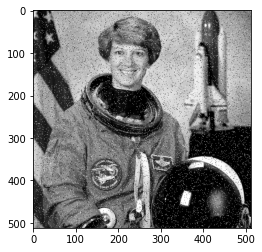

In [21]:
#(a)
rng=np.random.default_rng(999)
p0=rng.integers(0,512*512,10000)
p1=rng.integers(0,512*512,10000)
astro2=astro_gray.copy()
astro2.ravel()[p0]=0
astro2.ravel()[p1]=255
fig,ax=plt.subplots()
ax.imshow(astro2)
plt.imshow(astro2,cmap='gray')
plt.show()

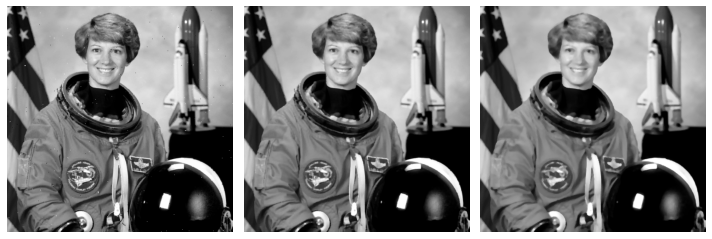

In [22]:
fig,ax=plt.subplots(1,3,figsize=(10,4))
for i,r in enumerate([1,2,3]):
    ax[i].imshow(median(astro2, disk(r)),cmap='gray')
    ax[i].axis('off')
fig.tight_layout()

### 14.5 圖像修復 image inpaiting

#### 第19題

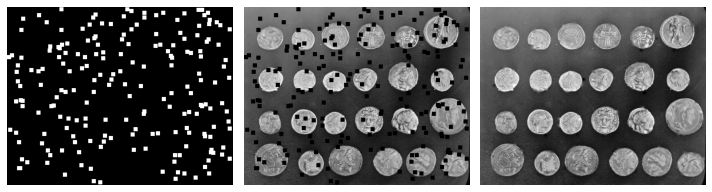

In [23]:
# 影像修復
from skimage.restoration import inpaint

# 建立遮罩 
coins=data.coins()
np.random.seed(2022)
mask=np.zeros(coins.shape[0:2]).astype(bool)
size=7

for _ in range(200):
    x=np.random.randint(0,coins.shape[0]-size)
    y=np.random.randint(0,coins.shape[1]-size)
    mask[x:x+size,y:y+size]=True

# 生成遭破壞的影像
coins_damage=coins* ~mask[:,:]

# 影像修復
out=inpaint.inpaint_biharmonic(coins_damage,mask)

# 顯示影像
fig,ax=plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(mask,cmap='gray')
ax[1].imshow(coins_damage,cmap='gray')
ax[2].imshow(out,cmap='gray')
for i in range(3):
    ax[i].axis('off')
fig.tight_layout()